In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Open and read csv files

fy2015 = "Resources/fy2015_WA_retail_revenue_by_county.csv"
fy2016 = "Resources/cleaned_fy2016_WA_retail_revenue_by_county.csv"
fy2017 = "Resources/cleaned_fy2017_WA_retail_revenue_by_county.csv"
classification_file = "Resources/class_county.csv"


fy2015_df = pd.read_csv(fy2015)
fy2016_df = pd.read_csv(fy2016)
fy2017_df = pd.read_csv(fy2017)
classification = pd.read_csv(classification_file)


In [3]:
# Renaming column to be easier to read
classification = classification.rename(index=str, 
                                       columns={"2013 Metropolitan, Micropolitan, Noncore (OMB)": "Classification"})

# Uppercase county column in order to be able to merge
classification["County"] = classification["County"].str.upper()

In [4]:
#merged fy2015 and fy2016 sales revenue county data
fy2015_fy2016_merge=pd.merge(fy2015_df, fy2016_df, on='County')
fy2015_fy2016_merge.head()

,County,Reporting Period_x,Total Sales_x,Excise Tax,Unnamed: 0,Reporting Period_y,Total Sales_y,Excise Tax
0,ASOTIN,7/1/2014 - 6/30/2015,"$78,390","$19,597",0,07/01/2015 - 06/30/2016,"$2,390,504","$884,487"
1,BENTON,7/1/2014 - 6/30/2015,"$2,840,372","$710,093",1,07/01/2015 - 06/30/2016,"$4,970,194","$1,838,972"
2,CHELAN,7/1/2014 - 6/30/2015,"$1,392,079","$348,020",2,07/01/2015 - 06/30/2016,"$4,801,762","$1,776,652"
3,CLALLAM,7/1/2014 - 6/30/2015,"$1,400,405","$350,101",3,07/01/2015 - 06/30/2016,"$5,217,200","$1,930,364"
4,CLARK,7/1/2014 - 6/30/2015,"$24,732,262","$6,183,065",4,07/01/2015 - 06/30/2016,"$46,119,692","$17,064,286"


In [5]:
#merged fy2017 sales revenue county data
fy_merge=pd.merge(fy2015_fy2016_merge, fy2017_df, on='County')
fy_merge.head()

,County,Reporting Period_x,Total Sales_x,Excise Tax,Unnamed: 0_x,Reporting Period_y,Total Sales_y,Excise Tax_x,Unnamed: 0_y,Reporting Period,Total Sales,Excise Tax_y
0,ASOTIN,7/1/2014 - 6/30/2015,"$78,390","$19,597",0,07/01/2015 - 06/30/2016,"$2,390,504","$884,487",1,07/01/2016 - 06/30/2017,"$7,901,349.03","$2,923,499.13"
1,BENTON,7/1/2014 - 6/30/2015,"$2,840,372","$710,093",1,07/01/2015 - 06/30/2016,"$4,970,194","$1,838,972",2,07/01/2016 - 06/30/2017,"$14,867,438.10","$5,500,952.10"
2,CHELAN,7/1/2014 - 6/30/2015,"$1,392,079","$348,020",2,07/01/2015 - 06/30/2016,"$4,801,762","$1,776,652",3,07/01/2016 - 06/30/2017,"$7,449,552.84","$2,756,334.63"
3,CLALLAM,7/1/2014 - 6/30/2015,"$1,400,405","$350,101",3,07/01/2015 - 06/30/2016,"$5,217,200","$1,930,364",4,07/01/2016 - 06/30/2017,"$10,671,708.82","$3,948,532.28"
4,CLARK,7/1/2014 - 6/30/2015,"$24,732,262","$6,183,065",4,07/01/2015 - 06/30/2016,"$46,119,692","$17,064,286",5,07/01/2016 - 06/30/2017,"$56,832,141.35","$21,027,892.30"


In [6]:
#Rename the final merge df to categorize population and sales
renamed_df = fy_merge.rename(columns={"Total Sales":"Sales 2017", "Total Sales_x":"Sales 2015","Total Sales_y":"Sales 2016"})

#filter for desired columns
filtered_df=renamed_df[['County','Sales 2015','Sales 2016','Sales 2017']]
filtered_df.head()

,County,Sales 2015,Sales 2016,Sales 2017
0,ASOTIN,"$78,390","$2,390,504","$7,901,349.03"
1,BENTON,"$2,840,372","$4,970,194","$14,867,438.10"
2,CHELAN,"$1,392,079","$4,801,762","$7,449,552.84"
3,CLALLAM,"$1,400,405","$5,217,200","$10,671,708.82"
4,CLARK,"$24,732,262","$46,119,692","$56,832,141.35"


In [7]:
#convert df from string to float, first remove commas and dollar signs. FY2015

try:
    filtered_df['Sales 2015']=filtered_df['Sales 2015'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2015']=filtered_df['Sales 2015'].str.replace(',','')
except:
    pass

filtered_df['Sales 2015']=filtered_df['Sales 2015'].astype('float')

#FY2016

try:
    filtered_df['Sales 2016']=filtered_df['Sales 2016'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2016']=filtered_df['Sales 2016'].str.replace(',','')
except:
    pass

filtered_df['Sales 2016']=filtered_df['Sales 2016'].astype('float')

#FY2017

try:
    filtered_df['Sales 2017']=filtered_df['Sales 2017'].str.replace('$','')
except:
    pass
try:
    filtered_df['Sales 2017']=filtered_df['Sales 2017'].str.replace(',','')
except:
    pass

filtered_df['Sales 2017']=filtered_df['Sales 2017'].astype('float')

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [8]:
#Merged county classification with filtered_df

filtered_county_type_df = pd.merge(filtered_df, classification, how="left", on=["County", "County"])
filtered_county_type_df.head()

,County,Sales 2015,Sales 2016,Sales 2017,Classification,"April 1, 2014 Population (OFM)"
0,ASOTIN,78390.0,2390504.0,7901349.03,Metropolitan,21950
1,BENTON,2840372.0,4970194.0,14867438.10,Metropolitan,186500
2,CHELAN,1392079.0,4801762.0,7449552.84,Metropolitan,74300
3,CLALLAM,1400405.0,5217200.0,10671708.82,Micropolitan,72500
4,CLARK,24732262.0,46119692.0,56832141.35,Metropolitan,442800


In [9]:
filtered_county_type_df = filtered_county_type_df[['County','Sales 2015','Sales 2016','Sales 2017', 'Classification']]
filtered_county_type_df.head()

,County,Sales 2015,Sales 2016,Sales 2017,Classification
0,ASOTIN,78390.0,2390504.0,7901349.03,Metropolitan
1,BENTON,2840372.0,4970194.0,14867438.10,Metropolitan
2,CHELAN,1392079.0,4801762.0,7449552.84,Metropolitan
3,CLALLAM,1400405.0,5217200.0,10671708.82,Micropolitan
4,CLARK,24732262.0,46119692.0,56832141.35,Metropolitan


In [10]:
#Created dataframes for urban, suburban and rural counties

urban_revenue = filtered_county_type_df["Classification"]=="Metropolitan"
sub_revenue = filtered_county_type_df["Classification"]=="Micropolitan"
rural_revenue = filtered_county_type_df["Classification"]=="Noncore"

urban_revenue_df = filtered_county_type_df.loc[urban_revenue]
sub_revenue_df = filtered_county_type_df.loc[sub_revenue]
rural_revenue_df = filtered_county_type_df.loc[rural_revenue]

In [11]:
#Summed sales revenue for each fiscal year, and converted to millions of US$

urban_fy15_revenue = urban_revenue_df["Sales 2015"].sum()/1000000
urban_fy16_revenue = urban_revenue_df["Sales 2016"].sum()/1000000
urban_fy17_revenue = urban_revenue_df["Sales 2017"].sum()/1000000

sub_fy15_revenue = sub_revenue_df["Sales 2015"].sum()/1000000
sub_fy16_revenue = sub_revenue_df["Sales 2016"].sum()/1000000
sub_fy17_revenue = sub_revenue_df["Sales 2017"].sum()/1000000

rural_fy15_revenue = rural_revenue_df["Sales 2015"].sum()/1000000
rural_fy16_revenue = rural_revenue_df["Sales 2016"].sum()/1000000
rural_fy17_revenue = rural_revenue_df["Sales 2017"].sum()/1000000

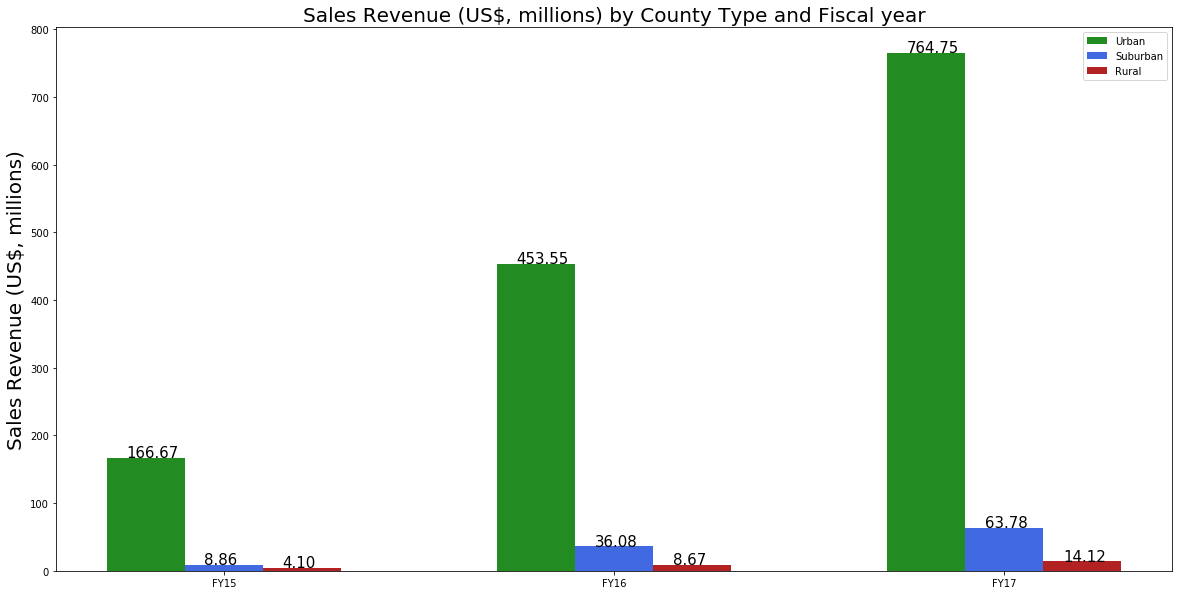

In [13]:
#Plotted Sales Revenue by County Type and Fiscal year

x_labels = ["FY15", "FY16", "FY17"]

x = np.arange(len(x_labels))
urban_y_list = [urban_fy15_revenue, urban_fy16_revenue, urban_fy17_revenue]
sub_y_list = [sub_fy15_revenue, sub_fy16_revenue, sub_fy17_revenue]
rural_y_list = [rural_fy15_revenue,rural_fy16_revenue, rural_fy17_revenue]

urban_plot = plt.bar(x - 0.2, urban_y_list, width=0.2, color = "forestgreen")
sub_plot = plt.bar(x, sub_y_list, width=0.2, color = "royalblue")
rural_plot = plt.bar(x + 0.2, rural_y_list, width=0.2, color = "firebrick")

plt.xticks(x, x_labels)
plt.title("Sales Revenue (US$, millions) by County Type and Fiscal year", fontsize=20)
plt.ylabel("Sales Revenue (US$, millions)", fontsize=20)
plt.legend((urban_plot, sub_plot, rural_plot), ('Urban', 'Suburban', 'Rural'))

plt.rc('figure', figsize = (20,10))

formatted_urban_y = ["%.2f" % urban_y for urban_y in urban_y_list]
for i in range(len(x)):
    plt.text(x = x[i] - 0.25, y = urban_y_list[i] + 1, s = formatted_urban_y[i], size = 15)
formatted_sub_y = ["%.2f" % sub_y for sub_y in sub_y_list]
for i in range(len(x)):
    plt.text(x = x[i] - 0.05, y = sub_y_list[i] + 1, s = formatted_sub_y[i], size = 15)           
formatted_rural_y = ["%.2f" % rural_y for rural_y in rural_y_list]
for i in range(len(x)):
    plt.text(x = x[i]+ 0.15, y = rural_y_list[i] + 1, s = formatted_rural_y[i], size = 15)    

plt.savefig("Sales Revenue by County Type and FY")